Filtro de Kalman para series de tiempo.

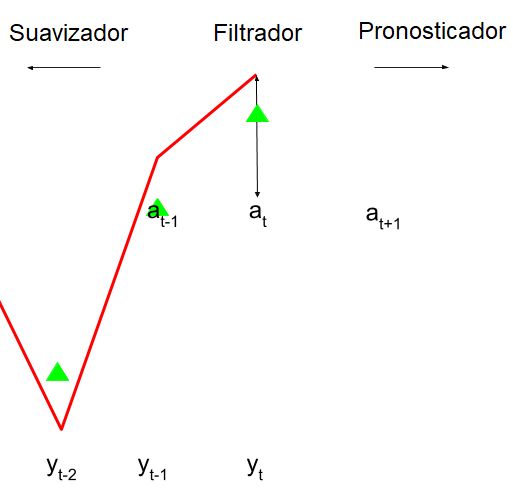









El Filtro de Kalman es la expansión del Filtro Wiener-Kolmogorov
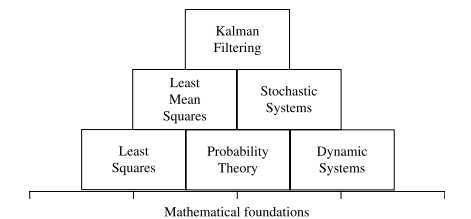
[1] Mohinder entre otros (2001)


Wiener representó incertidumbres dinámicas como medidas de probabilidad. Su solución fue mediante la predicción del error cuadrático medio en términos de las funciones de autocorrelación de las señales y el ruido.
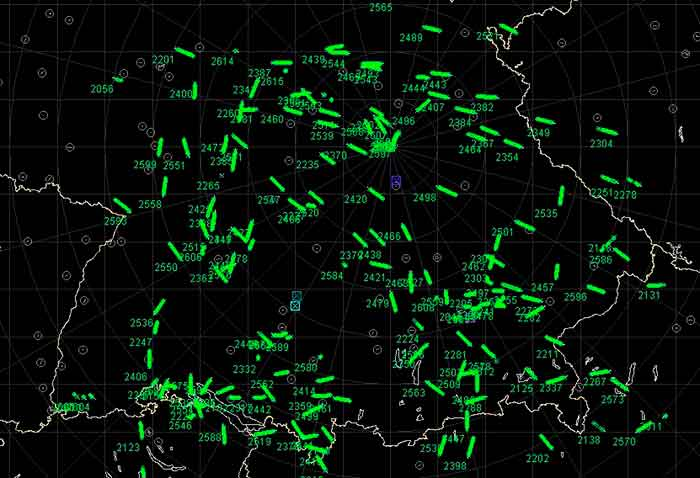
Representa la naturaleza probabilística de fenómenos aleatorios en términos de densidades espectrales de potencia. [2] Kolmogorov (1941)


Ventajas del FK contra el FW-K.
1. El Filtro de Kalman es en tiempo discreto y el Filtro de Wiener-Kolmogorov es analógico.
2. EL FK requiere menos preparación matemática para aprenderlo por lo que se estudia en las carreras de ingeniería.

Filtro de Kalman.
- Es un algoritmo recursivo.
- Combina diferentes fuentes de información para dar mejores estimaciones.
- El FK provee de la información necesaria para detectar y rechazar medidas anómalas.

El FK se basa en un proceso de dos etapas cuyo objetivo es encontrar el estimador óptimo en términos del error cuadrático medio con el conocimiento previo del sitema y las observaciones junto con la descripción de su ruido y errores.
1. La predicción del estado del sistema.
2. Incorporación de las observaciones estimadas.
Permite la estimación de modelos que poseen perturbaciones aleatorias.

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
sns.set(style='ticks', context='talk')

In [45]:
def     MAPE(y, yhat):
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape = round(np.sum(np.abs(yhat-y))/np.sum(np.abs(y))*100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape    

Consideremos la siguiente series de tiempo que es basicamente una caminata aleatoria:
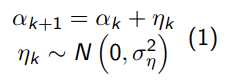

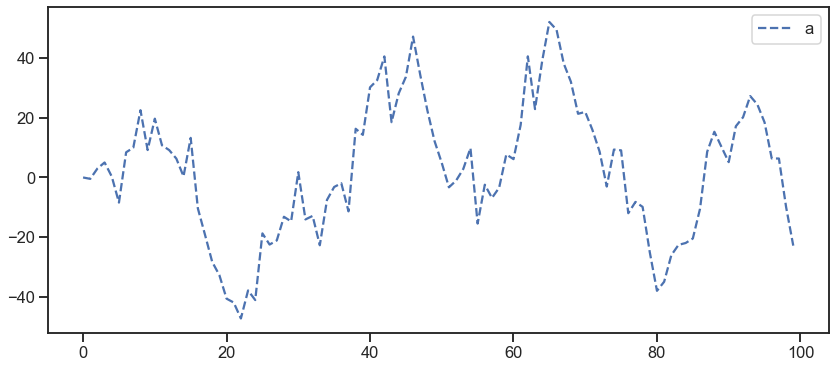

In [46]:
sigma_h = 10.0
h = np.random.normal(0, sigma_h, 110)
h[0] = 0.0
a = np.cumsum(h)

df = pd.DataFrame(a[0:100], columns=['a'])
_=df.plot(figsize=(14,6), style='b--')

Ahora introducimos una segunda serie de tiempo que es básicamente la misma pero con ruido.
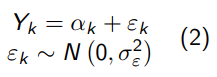

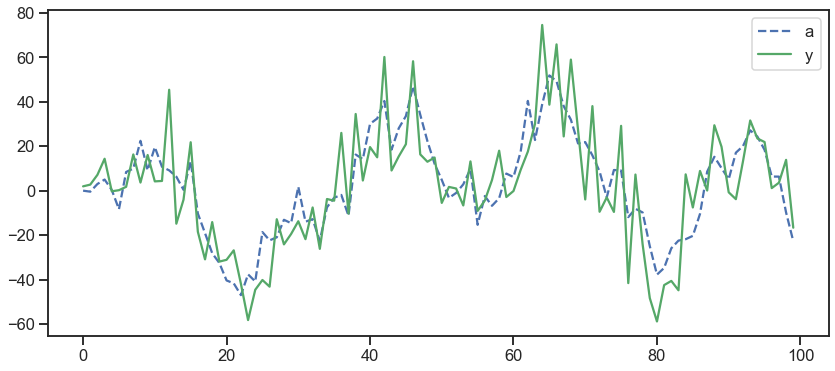

In [47]:
sigma_e = 15.
e = np.random.normal(0, sigma_e, 110)
df['y'] = a[0:100] + e[0:100]
_=df.plot(figsize=(14,6), style=['b--', 'g-',])

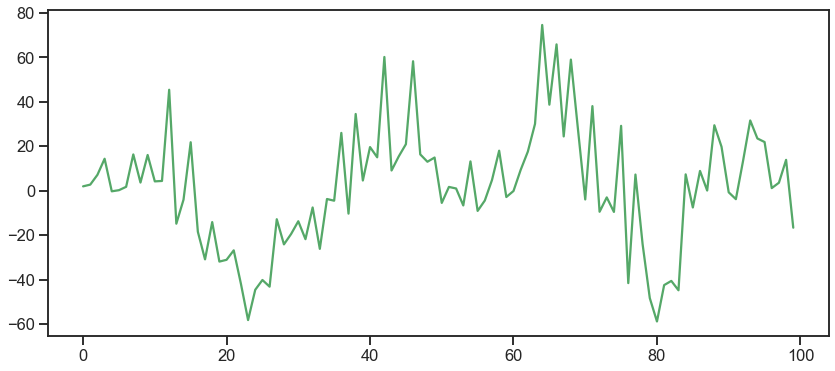

In [48]:
_=df.y.plot(figsize=(14,6), style=['g-',])

Si solo podemos observar "y" necesitamos un filtro que pueda recuperar la señal por filtrar el ruido.
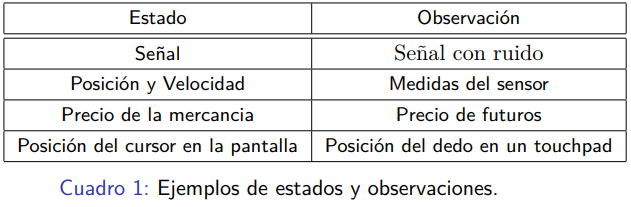

Modelos Lineales en Espacio de Estados.
Ecuación de Estados y de Observaciones:
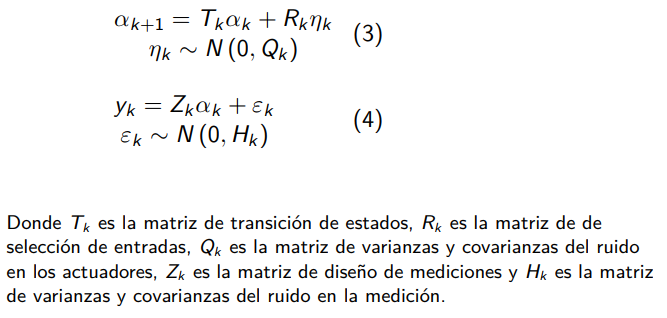

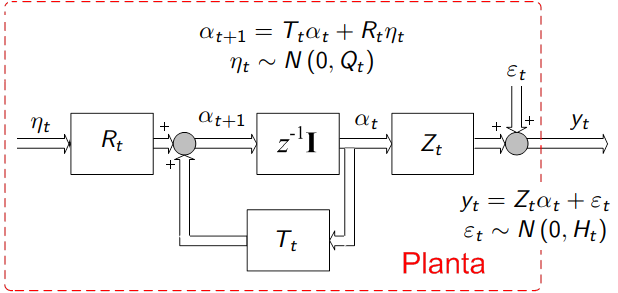

Este modelo se ve muy simple pero de aquí se partirá para ver los principios del análisis en espacio de estados.
1. Filtrado.
2. Suavizado.
3. Inicializar el sistema recursivo.
4. Pronóstico de "n" pasos adelante.
5. Tratamiento de observaciones faltantes.
6. Estimación de los meta-parámetros.
7. Diagnósticos para probar la validez del modelo.

Matriz de Covarianzas del error.
La idea es encontrar un estimador del estado alpha en el instante k a partir de las observaciones tomadas hasta el instante j menor o igual que k.
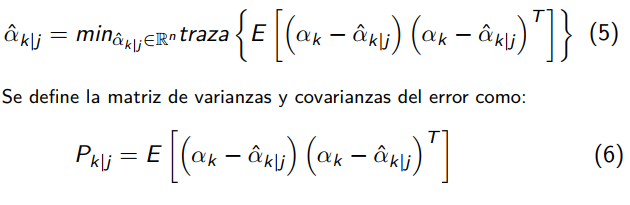

El FK es la combinación entre la predicción por el modelo teórico y las observaciones.
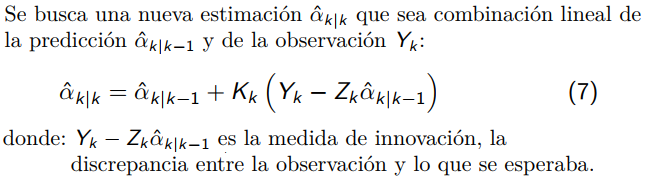

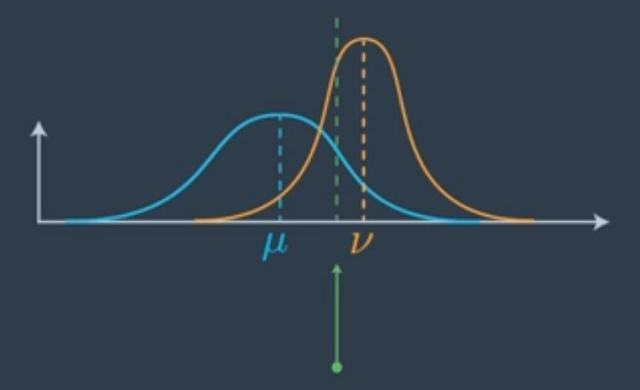

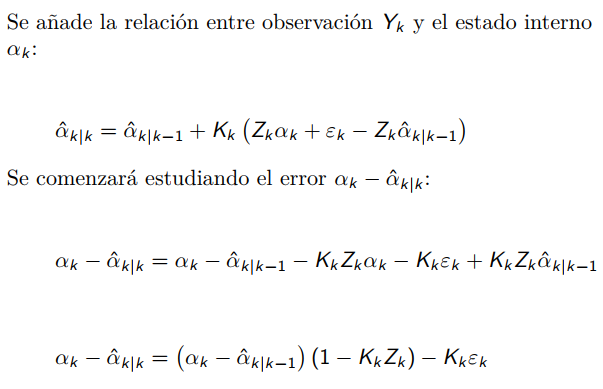

In [32]:
def update (mean1, var1, mean2, var2):
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var  = var2*var1/(var2+var1)
    #new_var  = 1/(1/var1+1/var2)
    
    return [new_mean, new_var]

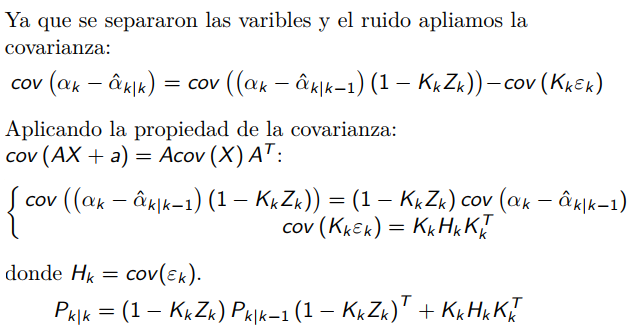

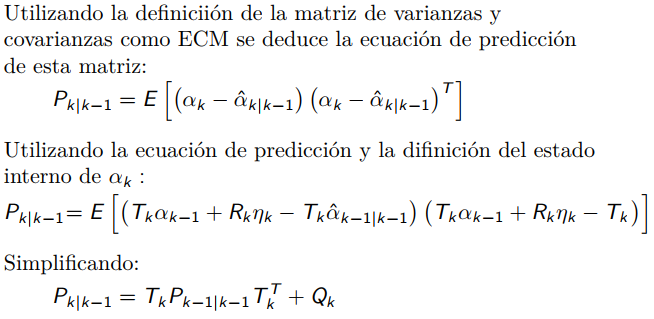

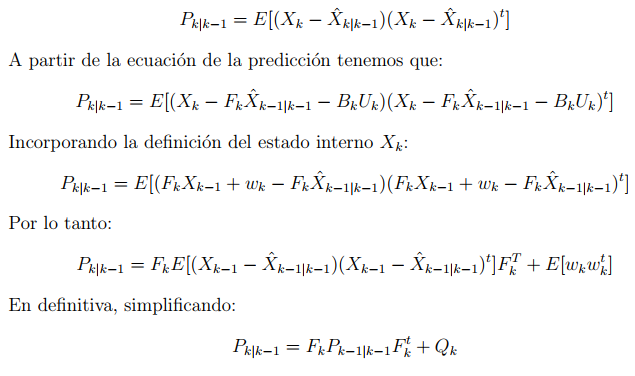

Ganancia de Kalman.
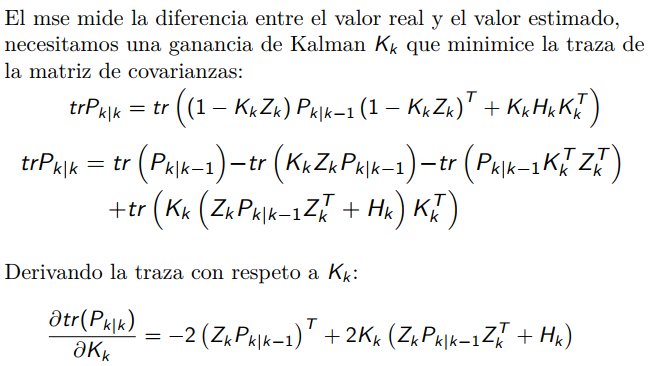

Ganancia de Kalman
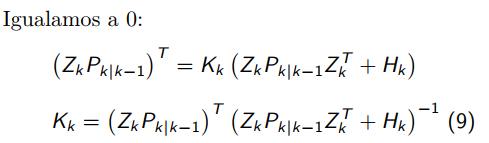

Ecuaciones del algoritmo:
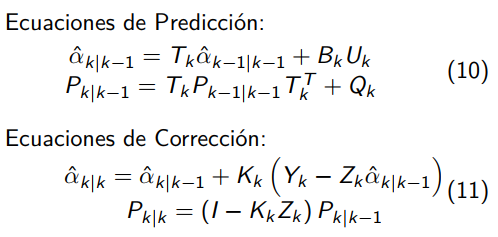
[3] Munuera (2018)

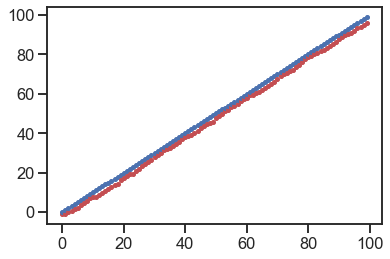

In [185]:
Y_raw = [i for i in range(500)]
YY_raw = np.ones(500)
# Ruido gaussiano con media 0 y varianza de 1, con precisión de dos decimales
noise = np.round(np.random.normal(0, 1, 500), 2)
# Suma las observaciones de zy el ruido
Y = np.mat(Y_raw) + np.mat(noise)
X = np.mat([[0,]])                   #Vector de estados inicializado en 0#Modificar aquí para cambiar base
P = np.mat([[1]])                    #Matriz de covarianza P en estado inicial
T = np.mat([[1]])                    #Matriz de transición de estados
Q = np.mat([[0.1]])                  #MAtriz de covarianza Q, se define muy pequeña porque se cree que F es muy precisa
Z = np.mat([1])                      #Matriz de Observación
H = np.mat([1])                      #Matriz de covarianza R de ruido observada
B = np. mat([[1]])                   #Matriz de entradas
U = np.mat([[0]])                    #Vector de entradas

X_FK = []
XFK = []

for i in range(100):
    x_predict = T * X + B * U                      
    p_predict = T * P * T.T + Q
    K = p_predict * Z.T / (Z * p_predict * Z.T + H)
    X = x_predict + K *(Y[0, i] - Z * x_predict)
    P = (1 - K * Z) * p_predict
    
    x_parray = x_predict.reshape(-1)
    X_FK.append(x_parray[:])
    xarray = X.reshape(-1)
    XFK.append(xarray[:])

    #plt.plot(Y_raw[i],X[1, 0], 'ro', markersize = 4)
    plt.plot(Y_raw[i], X[0], 'ro', markersize = 4)
    plt.plot(Y_raw[i], Y_raw[i], 'bo', markersize = 4)   #Modificar aquí para cambiar base
    
plt.show()


98.17


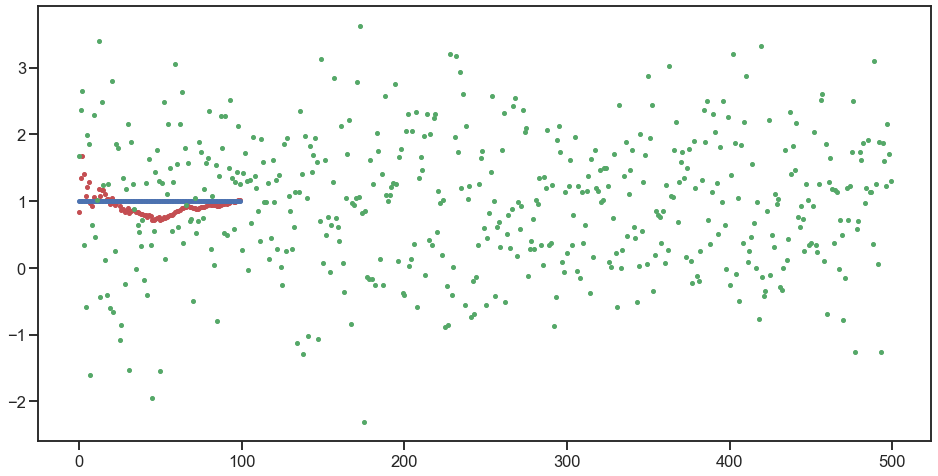

In [183]:
XFKF = np.array(XFK)
xfk = XFKF.reshape(-1)

Ygraf = Yarray[:100]

mape_pend = MAPE(Y_raw[0:100],xfk)

plt.figure(figsize=(16,8))
plt.plot(Y_raw[0:100], xfk, 'ro', markersize = 4)
plt.plot(Y_raw[0:100], YY_raw[0:100], 'bo', markersize = 4)    #Modificar aquí para cambiar base
#plt.plot(Y_raw, Ygraf.T, 'go', markersize = 4)
#print(Y_raw[0:100])
print(mape_pend)
#print(xarray)
#print(X_FK)
#print(XFK)
#print(XFKK)
#print(xfk)
#print(YY_raw)

In [178]:
print(Ygraf.shape)
print(Yarray[0:100].shape)


(1, 500)
(1, 500)


El propósito del FK es proveer un estimador que minimizará el error cuadrático medio (mse por sus siglas en inglés) a partir de las observaciones.

1. Filtrado.
La recursión del FK para este modelo:
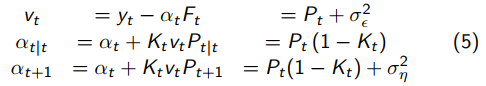


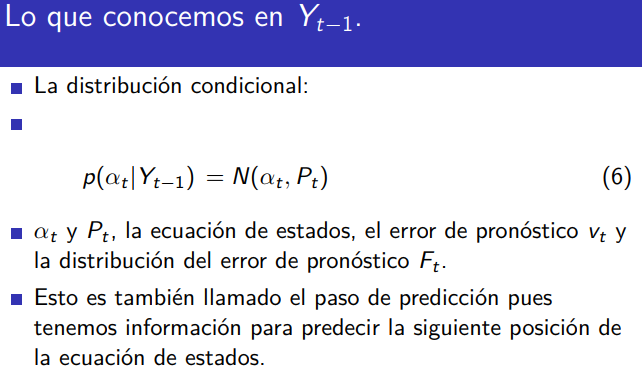

In [50]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

kf = KalmanFilter(1,1)

kf.obs_cov = np.array([sigma_e]) # H
kf.state_cov = np.array([sigma_h])  # Q
kf.design = np.array([1.0])  # Z
kf.transition = np.array([1.0])  # T
kf.selection = np.array([1.0])  # R

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


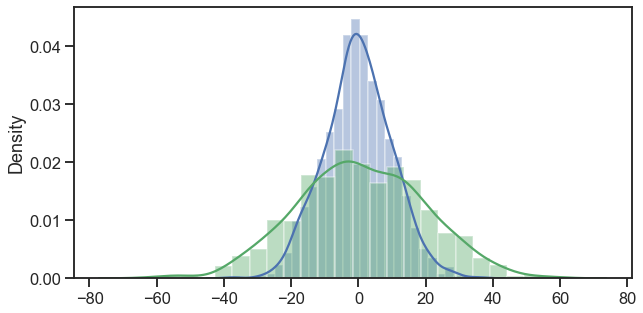

In [51]:
v_next = []
a_dist = np.random.normal(0, sigma_h, 1000)
a_1 = 0.
for i in range(1000):
    a_next = a_1 + np.random.normal(0, sigma_h)
    v_next.append(a_next + np.random.normal(0, sigma_e))
fig, ax = plt.subplots(figsize=(10,5))
_=sns.distplot(a_dist, color='b', label='alpha', ax=ax)
_=sns.distplot(v_next, color='g', label='vt', ax=ax)

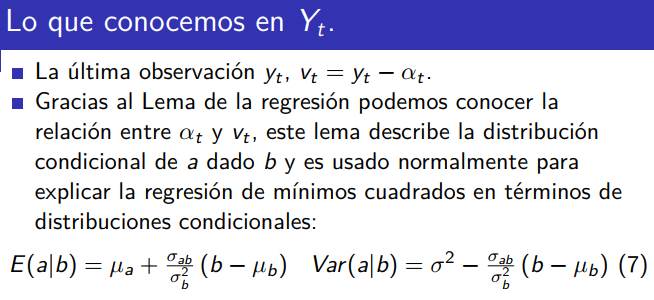

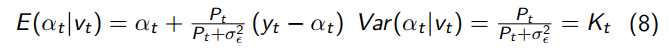
- Se aplica el lema al estado estimado y al error de estimación dada la observación.
- Pt es la covarianza la que da la relación entre la variable observada y el estado.
- Si el ruido en la observación es pequeño, entonces K es cercano a 1 y se ajusta el estado estimado cerca de la observación.
- Si el ruido es grande comparado a la varianza en el estado es mejor permanecer cerca del estado.
- Este lema muestra que el Filtro de Kalman es el estimador óptimo para los casos Lineal y Gaussiano.

El filtrado mejora la estimación del estado actual dada la última observación por medio de determinar una nueva distribución condicional del estado.
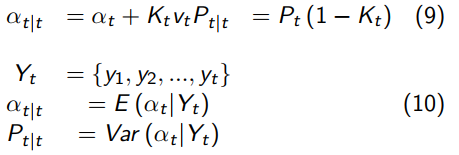

MAPE de la señal medida con ruido con respecto a la sin ruido
67.22
MAPE de la señal filtrada con respecto a la sin ruido
46.07


<AxesSubplot:>

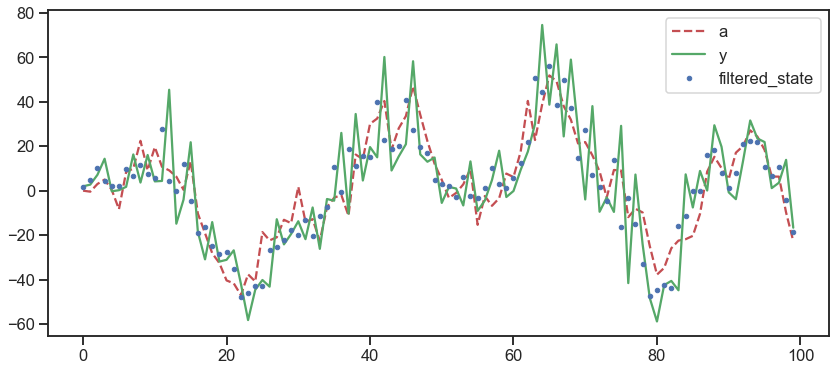

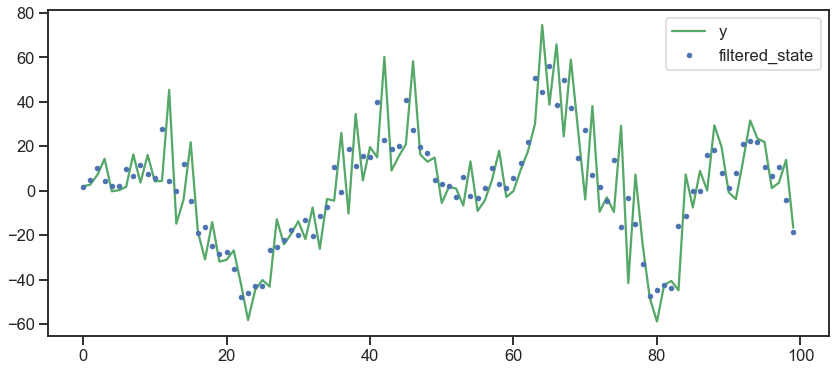

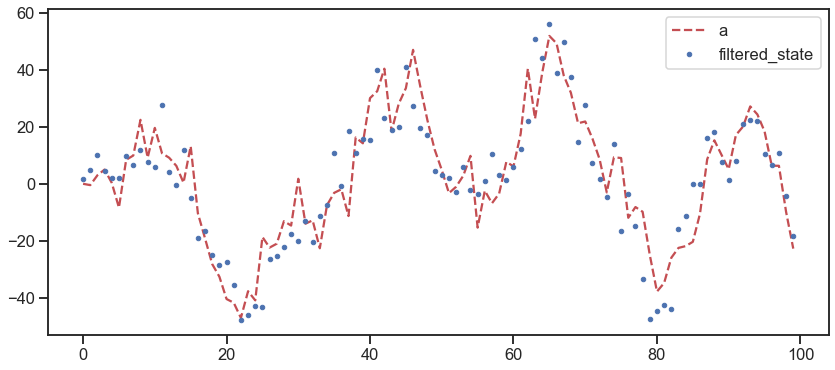

In [54]:
#from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

#kf = KalmanFilter(1,1)

# Initialize known state
kf.initialize_known(np.array([0.0]), np.array([[sigma_h]]))
# Bind data
y = a + e
#y = np.array(df['y'])
kf.bind(y.copy())
r = kf.filter()

df['filtered_state'] = r.filtered_state[0][1:101]

mape_y = MAPE(df[['a']],df[['y']])
print('MAPE de la señal medida con ruido con respecto a la sin ruido')
print(mape_y)

mape_filt = MAPE(df[['a']],df[['filtered_state']])
print('MAPE de la señal filtrada con respecto a la sin ruido')
print(mape_filt)

df['filtered_state'] = r.filtered_state[0][1:101]
df[['a', 'y', 'filtered_state']].plot(figsize=(14,6), style=['r--', 'g-', 'b.'])
df[['y', 'filtered_state']].plot(figsize=(14,6), style=['g-', 'b.'])
df[['a', 'filtered_state']].plot(figsize=(14,6), style=['r--', 'b.'])

2. Pronosticando.
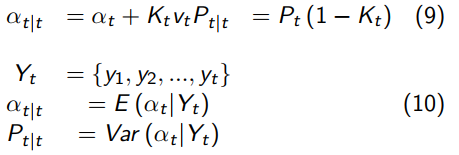
Para el caso de nivel local el pronóstico es el mismo que el filtrado con la diferencia quue la varianza crecer con cada paso del horizonte del pronóstico (pasos sin observación).

<AxesSubplot:>

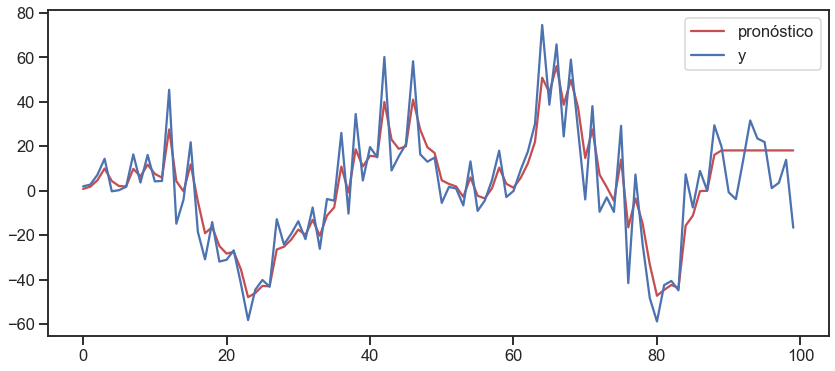

In [53]:
p = r.predict(0, 110, dynamic=90)
s_f = pd.Series(p.results.forecasts[0][1:])
df['pronóstico'] = pd.Series(p.results.forecasts[0][1:])
#print(s_f)
s_y = pd.Series(y)
#print(s_y)
#pd.DataFrame({'y':s_y, 'f':s_f}).iloc[-25:].plot(figsize=(12,6))
df[['pronóstico', 'y']].plot(figsize=(14,6), style=['r-', 'b-'])
#pd.DataFrame({'f':s_f}).plot(figsize=(12,6))

Para esta representación en EE univariable el pronóstico siempre será una línea horizontal al nivel del último valor del estado estimado.
Caso contrario, la incertidumbre del pronóstico se vuelve progresivamente más grande. (Graficar incertidumbre).


La recursión del Filtro de Kalman en General.
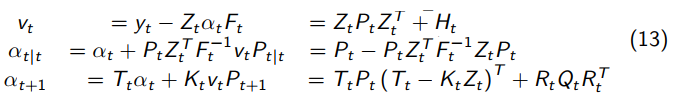
Principales diferencias con el modelo de nivel local:
1. La matriz de diseño (Zt) afecta la inovación y el pronóstico del error (Ft).
2. La matriz de transición (Tt) afecta las dinámicas de los estados.

DATE
1919-01-01      5.0585
1919-02-01      4.8349
1919-03-01      4.6952
1919-04-01      4.7790
1919-05-01      4.8070
                ...   
2016-02-01    104.3717
2016-03-01    103.3557
2016-04-01    103.8246
2016-05-01    103.5110
2016-06-01    104.1342
Name: INDPRO, Length: 1170, dtype: float64


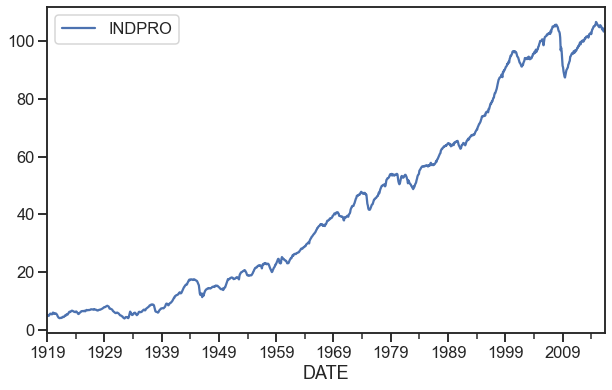

In [80]:
df_indpro = pd.read_csv('INDPRO.csv', parse_dates=['DATE'])
df_indpro.set_index('DATE', inplace=True)
df_indpro.head()
_ =df_indpro.plot(figsize=(10,6))
print(df_indpro['INDPRO'])

Modelo de Caminata Aleatoria con ruido en la medición y tendencia.
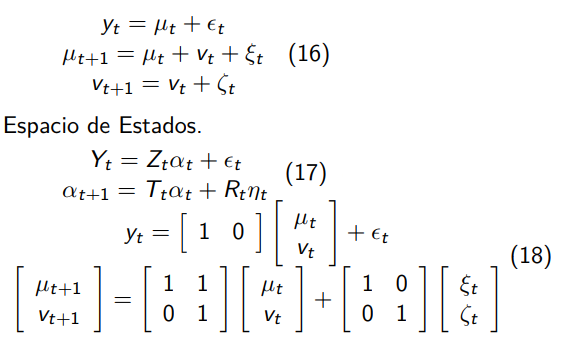

IndexError: index 1 is out of bounds for axis 0 with size 1

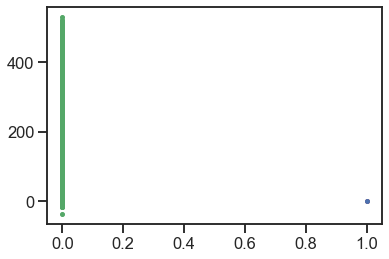

In [189]:
Y_raw = [i for i in range(500)]
# Ruido gaussiano con media 0 y varianza de 1, con precisión de dos decimales
noise = np.round(np.random.normal(0, 20, 500), 2)
# Suma las observaciones de zy el ruido
Y = np.mat(Z_raw) + np.mat(noise)
X = np.mat([[0,], [0,]])                   #Vector de estados inicializado en 0
P = np.mat([[1, 0], [0, 1]])               #Matriz de covarianza P en estado inicial
T = np.mat([[1, 1], [0, 1]])               #Matriz de transición de estados
Q = np.mat([[0.0001, 0], [0, 0.0001]])     #MAtriz de covarianza Q, se define muy pequeña porque se cree que F es muy precisa
Z = np.mat([1, 0])                         #Matriz de Observación
H = np.mat([20])                            #Matriz de covarianza R de ruido observada
B = np.mat([[1, 0], [0, 1]])               #Matriz de entradas
U = np.mat([[0,], [0,]])                   #Vector de entradas

X_FK = []
P_FK = []
KFK = []
XFK = []
PFK = []

for i in range(100):
    x_predict = T * X + B * U                      
    p_predict = T * P * T.T + Q
    K = p_predict * Z.T / (Z * p_predict * Z.T + H)
    X = x_predict + K *(Y[0, i] - Z * x_predict)
    P = (np.eye(2) - K * Z) * p_predict
    
    x_parray = x_predict.reshape(-1)
    X_FK.append(x_parray[:])
    #P_parray = P_predict.reshape(-1)
    #P_FK.append(P_parray[:])
    #karray = K.reshape(-1)
    #KFK.append(karray[:])
    xarray = X.reshape(-1)
    XFK.append(xarray[:])
    #Parray = P.reshape(-1)
    #PFK.append(Parray[:])

    #plt.plot(Y_raw[i],X[1, 0], 'ro', markersize = 4)
    plt.plot(Y_raw[i], X[0, 0], 'ro', markersize = 4)
    plt.plot(Y_raw[i], Y_raw[i], 'bo', markersize = 4)
    #plt.plot(Y_raw[i], Y[i], 'go', markersize = 4)
    
plt.show()

7.77


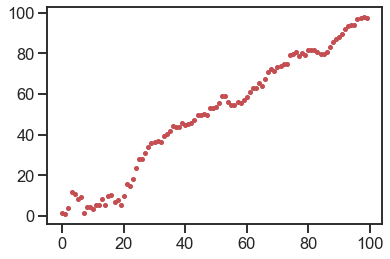

In [187]:
XFKK = np.array(XFK)
xfk = XFKK.reshape(-1,2)
mape_pend = MAPE(Y_raw[0:100],xfk[:,0])
plt.plot(Y_raw[0:100], xfk[:,0], 'ro', markersize = 4)
print(mape_pend)

22.0


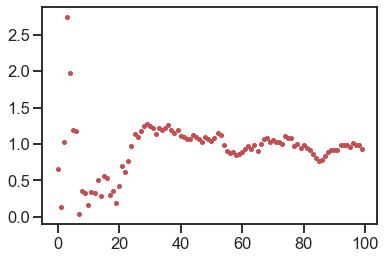

In [188]:
mape_trend = MAPE(np.ones(100),xfk[:,1])
#mape_trend = MAPE(np.ones(60),xfk[40:,1])
plt.plot(Y_raw[0:100], xfk[:,1], 'ro', markersize = 4)
#plt.plot(Y_raw[40:100], xfk[40:,1], 'ro', markersize = 4)
print(mape_trend)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


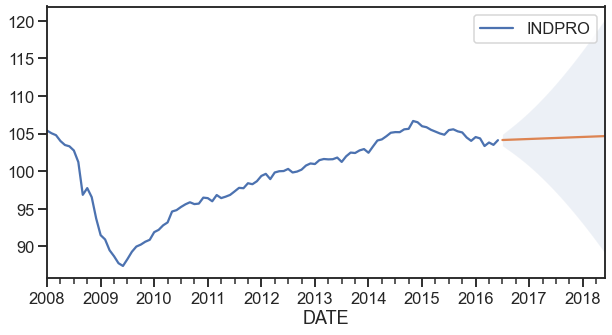

In [95]:
from statsmodels.tsa.statespace.structural import UnobservedComponents

indpro_mod = UnobservedComponents(df_indpro.INDPRO,
                                  level=True,
                                  trend=True,
                                  stochastic_level=True,
                                  stochastic_trend=True)
indpro_res = indpro_mod.fit(method='powell', disp=False)
#indpro_res.summary()

fig, ax = plt.subplots(figsize=(10,5))

fres = indpro_res.get_forecast('2018-06-01')
df_indpro['2008-01-01':].plot(ax=ax)
fres.predicted_mean.plot()
fres_ci = fres.conf_int()
_=ax.fill_between(fres_ci.index, fres_ci['lower INDPRO'], fres_ci['upper INDPRO'], alpha=0.1)

Modelo en Espacio de Estados: AR(p).
    Comúnmente p=2 
Gracias a esto, todas las variantes ARIMA pueden ser puestas en forma de EE.


5. Tratamiento de observaciones faltantes.
6. Estimación de los meta-parámetros.
7. Diagnósticos para probar la validez del modelo.

Conclusiones:
Es la prueba matemática del siguiente valor, no debería haber mejor método si:
- El modelo matemático (Matriz de transición de estados) refleja fielmente el comportamiento del sistema.
- La modelación del ruido es correcta.
Para series de tiempo 

[1]  Mohinder, S. G., & Angus, P. A. (2001). Kalman Filtering: Theory and Practice with MATLAB. In John Wiley&Sons,Inc (Vol. 53, Issue 9).

[2] Kolmogorov, A. N. (1941). Dissipation of energy in the locally isotropic turbulence. In Dokl. Akad. Nauk SSSR A (Vol. 32, pp. 16-18).

[3] Munuera Raga, M. C. (2018). Filtro de Kalman y sus aplicaciones.